**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

**The network architecture.**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

**Preparing the image data.**

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

**Fitting the model.**

In [ ]:
model.fit(train_images,train_labels,epochs=5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8735 - loss: 0.4369
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9650 - loss: 0.1185
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9778 - loss: 0.0739
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9852 - loss: 0.0498
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0398


**Using the model to make predictions.**

In [ ]:
test_digits  = test_images[:10]
predictions = model.predict(test_digits)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
predictions[0]

array([4.3710052e-08, 7.4798345e-09, 9.1944821e-06, 2.0136600e-05,
       9.0165904e-12, 1.4908964e-09, 4.8530743e-13, 9.9997002e-01,
       2.0921622e-07, 3.8602047e-07], dtype=float32)

In [ ]:
predictions.argmax()

np.int64(7)

In [ ]:
predictions[0][7]

np.float32(0.99997)

In [ ]:
test_labels[0]

np.uint8(7)

**Displaying the first digit.**

TypeError: Invalid shape (784,) for image data

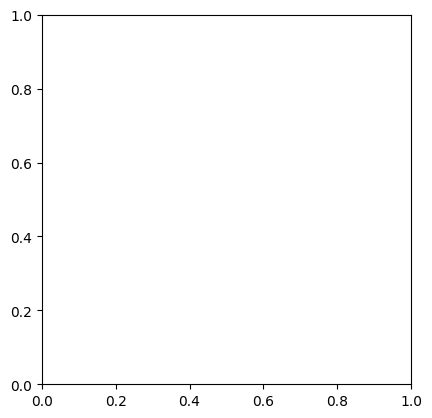

In [ ]:
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit,  cmap=plt.cm.binary)
plt.show()

**Evaluating the model on new data.**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

In [ ]:
print(f"test accuracy is {test_acc}")